# Regresión Lineal Múltiple
## Pasos para modelo de aprendizaje supervisado
### 1.Importar datos

In [1]:
#importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
#leer el archivo
datos=pd.read_csv('./winequality_red.csv')

In [4]:
#Muestra las 5 primeras filas
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#cracteristicas basicas estadísticas
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Separar datos de entrada X son caracteristicas y Y son etiquetas
x=datos.iloc[:,:-1] #con lo que vamos a predecir-->son todas las filas de todas las columnas excepto la última
y=datos.iloc[:,-1] #lo que vamos a predecir--> son todas las filas de la última columna

### 2. Dividir los datos en conjuntos de entrenamiento y prueba

El resultado de esta función se guardará en las variables:
-	x_train: conjunto de entrada para entrenamiento
-	x_test: conjunto de entradas para después de entrenarlo, evaluarlo con sus respectivas métricas.
-	y_train: conjunto de etiquetas para entrenamiento.
-	y_test: conjunto de etiquetas para prueba.

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=25)

### 3. Construir el modelo

In [9]:
modelo=LinearRegression()

### 4. Entrenar el modelo

In [10]:
modelo.fit(x_train,y_train)

LinearRegression()

### 5. Predicciones con datos de prueba

Para utilizar las métricas de evaluación es necesario probar el modelo con el conjunto de características de entradas destinadas para pruebas. Para ello, se utilizará el método: predict, el cual se utiliza para realizar predicciones con nuevos datos.
En la siguiente línea del código, la variable ‘y_obt’ almacenará un conjunto de predicciones o etiquetas que el modelo ha asignado a cada característica de entrada o cada elemento del conjunto ‘x_test’.

In [11]:
y_obt=modelo.predict(x_test)

**6. Métricas de Evaluación:**

***MSE:***

con la función mean_squared_error y los parámetros ‘y_test’ y ‘y_obt’. Donde ‘y_test’ son las etiquetas reales del conjunto de prueba correspondientes al conjunto real de datos, pero ‘y_obt’ son las valores objetivo resultado de las predicciones realizadas por el modelo con el conjunto de entradas de prueba o sea los *x_train*

In [12]:
error= mean_squared_error(y_test,y_obt)
print("El error es: ",error)

El error es:  0.41767474924794457


***Coefieciente de determinación R^2***

In [14]:
# si es cercano a 0 es un mal modelo
r2=r2_score(y_test,y_obt)
print("El coeficiente de determinacion es: ",r2)

El coeficiente de determinacion es:  0.31545168259752043


### 7. Predicciones con nuevos datos

con el modelo ya entranado y probado se realizan nuevas predicciones con nuevas carácteristicas de entrada, *ya no correspondientes al conjunto de datos original*

In [17]:
calidad = modelo.predict([[2, 5.0, 9.0, 6, 0.1, 0.1, 7, 0.2, 9, 0.01, 5]])
print(f"La calidad es: {calidad}")


La calidad es: [6.87138515]


C:\Users\Brithany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
#Imprimimos los valores
print(f"El coeficiente B1 es: {modelo.coef_}")
print(f"La Intercepción es: {modelo.intercept_}")

El coeficiente B1 es: [ 3.60217445e-02 -1.20149280e+00 -4.22002372e-01  1.87309823e-02
 -1.71270822e+00  3.40176201e-03 -3.01978708e-03 -1.95486946e+01
 -5.27841884e-01  9.38177588e-01  2.87698781e-01]
La Intercepción es: 23.896950458905607


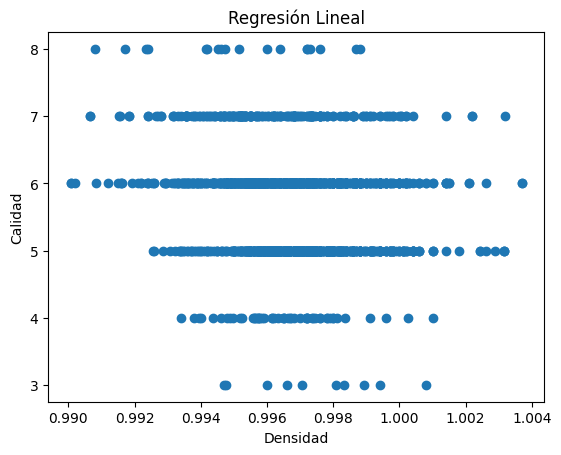

In [18]:
#Gráfica de dispersión
import matplotlib.pyplot as plt

plt.scatter(x['density'], y)
plt.title("Regresión Lineal")
plt.xlabel("Densidad")
plt.ylabel("Calidad")
plt.show()

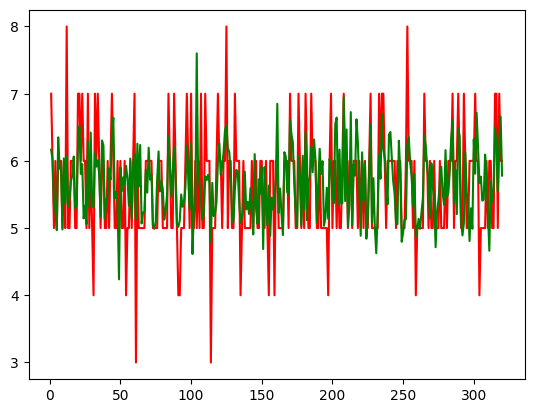

In [20]:
#Gráfica de valores obtenidos vs valores reales
#Creamos la lista desde 1 hasta la longitud de y_test
lista = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(lista, y_test, color='r')
plt.plot(lista, y_obt, color='g')
plt.show()